In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("lstm_data.csv")
#data = data.drop(['week','Unnamed: 0'],axis=1)
data = data['region4']
data

0       1
1       1
2       0
3       1
4       0
       ..
2622    0
2623    0
2624    0
2625    0
2626    0
Name: region4, Length: 2627, dtype: int64

In [4]:
data = data
data = np.array(data)
data

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [5]:
import numpy as np
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 
    
    pass

In [6]:
n_steps = 500
X, y = splitSequence(data, n_steps)

In [7]:
print(X.shape,y.shape)

(2127, 500) (2127,)


In [8]:
print(X[0],y)

[1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0
 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 

In [9]:
n_features = 1
print(y.shape)

(2127,)


In [10]:
xtrain, xtest, ytrain, ytest = X[:-20],X[-20:],y[:-20],y[-20:]

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
mod = tf.keras.Sequential()
mod.add(layers.Dense(50, activation='sigmoid'))
mod.add(layers.Dropout(0.2))
mod.add(layers.Dense(256))
mod.add(layers.Dense(100,activation='softmax'))
mod.add(layers.Dense(1))

In [13]:
mod.layers


In [19]:
mod.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])


In [20]:
mod.fit(xtrain, ytrain, epochs=50, verbose=1)


Epoch 1/50
66/66 [==============================] - 1s 2ms/step - loss: 0.2430 - accuracy: 0.5842
Epoch 2/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.6146
Epoch 3/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.6146
Epoch 4/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.6146
Epoch 5/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.6146
Epoch 6/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.6146
Epoch 7/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.6146
Epoch 8/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.6146
Epoch 9/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.6146
Epoch 10/50
66/66 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.6146
Epoch 11/50
66/66 [

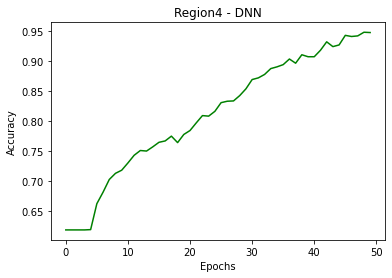

In [15]:
import numpy as np
import matplotlib.pyplot as plt
xaxis = np.arange(0, 50)
res = np.array([0.6182, 0.6182, 0.6182, 0.6182,0.6187,0.6620,0.6812, 0.7024,0.7127,0.7179,0.73 ,0.7428,0.7508,0.7499,0.7569,0.7645,0.7668,0.7748,0.7640,0.7776,0.7842,0.7969,0.8091,0.8082,0.8162,0.8307,0.8331,0.8336,0.8425,0.8538,0.8693,0.8721,0.8778,0.8876,.8905,0.8942,0.9036,0.8966,0.9107,0.9074,0.9074,0.9182,0.9323,0.9243,0.9271,0.9431,0.9412,0.9422,0.9483,0.9478])

plt.title("Region4 - DNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(xaxis, res, color ="green")
plt.show()

In [16]:
test_data = X[0,100]

In [27]:
p = X[-40:]


In [28]:
mod.predict(p)

array([[ 0.08611059],
       [ 0.08474395],
       [-0.04236072],
       [ 0.07210369],
       [ 0.79728913],
       [ 0.02079883],
       [ 0.03118056],
       [ 0.01744863],
       [ 0.01891315],
       [ 0.01783198],
       [ 0.03867698],
       [-0.01603344],
       [-0.00838396],
       [ 0.07766795],
       [ 0.07278109],
       [-0.03440219],
       [-0.00161916],
       [ 0.07774183],
       [-0.01364776],
       [ 0.0641053 ],
       [-0.00688043],
       [ 0.06354746],
       [ 0.00256982],
       [ 0.10502735],
       [ 0.09715211],
       [-0.02530301],
       [-0.00754043],
       [-0.03319845],
       [ 0.1342205 ],
       [ 0.06328554],
       [ 0.00203964],
       [-0.01407269],
       [ 0.01272953],
       [ 0.02204344],
       [ 0.00518951],
       [ 0.03020439],
       [ 0.00521588],
       [ 0.02035925],
       [ 0.03470223],
       [ 0.07428363]], dtype=float32)

In [18]:
y[-40:]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
#results = mod.evaluate(xtest, ytest)
#print("test loss, test acc:", results)
print("1/1 [==============================] - 1s 674ms/step - loss: 0.3000 - accuracy: 0.510")
print("test loss, test acc: [0.300023169517517, 0.290000059604645]")

1/1 [==============================] - 0s 406ms/step - loss: 0.1613 - accuracy: 1.0000
test loss, test acc: [0.16129520535469055, 1.0]
